In [1]:
import os
import s3fs

fs = s3fs.S3FileSystem(
    client_kwargs={'endpoint_url': 'https://' + 'minio.lab.sspcloud.fr'},
    key = os.environ["AWS_ACCESS_KEY_ID"], 
    secret = os.environ["AWS_SECRET_ACCESS_KEY"], 
    token = os.environ["AWS_SESSION_TOKEN"])

In [2]:
fs.ls("stuartbenoliel/stage_3A")

PermissionError: The Access Key Id you provided does not exist in our records.

In [ ]:
import pandas as pd
import geopandas as gpd

# Charger le fichier .gpkg

BUCKET = "stuartbenoliel"
FILE_KEY_S3 = "stage_3A/population_974.gpkg"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    df = gpd.read_file(file_in)

In [6]:
df.head()

,ID,HOUSEHOLD_ID,HOUSEHOLD_SIZE,GRD_MENAGE,MONOPARENT,NIVEAU_VIE,TILE_ID,AGE_CAT,AGE,ADULT,STATUT,geometry
0,CRS2975RES200mN7634200E359400_1_1,CRS2975RES200mN7634200E359400_1,1,False,False,54932.817564,CRS2975RES200mN7634200E359400,ind_80p,88,True,ADULT,POINT (359562.69 7634383.96)
1,CRS2975RES200mN7634200E359400_2_1,CRS2975RES200mN7634200E359400_2,2,False,True,28749.063818,CRS2975RES200mN7634200E359400,ind_0_3,1,False,MINOR,POINT (359584.49 7634368.54)
2,CRS2975RES200mN7634200E359400_2_2,CRS2975RES200mN7634200E359400_2,2,False,True,28749.063818,CRS2975RES200mN7634200E359400,ind_40_54,43,True,ADULT,POINT (359584.49 7634368.54)
3,CRS2975RES200mN7634200E359400_3_1,CRS2975RES200mN7634200E359400_3,2,False,False,5692.183823,CRS2975RES200mN7634200E359400,ind_55_64,63,True,ADULT,POINT (359562.69 7634383.96)
4,CRS2975RES200mN7634200E359400_3_2,CRS2975RES200mN7634200E359400_3,2,False,False,5692.183823,CRS2975RES200mN7634200E359400,ind_65_79,72,True,ADULT,POINT (359562.69 7634383.96)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

# Création d'un DataFrame avec une colonne contenant 100 valeurs entre 0 et 100

if 'df' not in globals():
    df = pd.DataFrame({
        'NIVEAU_VIE': [randint(0, 100) for _ in range(10000)],
        'AGE': [randint(50, 150) for _ in range(10000)],
    })

var_1 = 'NIVEAU_VIE'
var_2 = 'AGE'

df[[var_1, var_2]].describe()

,NIVEAU_VIE,AGE
count,867486.000000,867486.000000
mean,19099.050051,36.702046
std,17962.865946,23.299349
min,0.031077,0.000000
25%,7466.827986,16.000000
50%,14693.264965,36.000000
75%,24375.927556,54.000000
max,311916.812672,105.000000


In [8]:
df.groupby("HOUSEHOLD_SIZE")[[var_1]].describe().T

HOUSEHOLD_SIZE                1              2              3              4  \
NIVEAU_VIE count   84107.000000  139758.000000  212973.000000  242616.000000   
           mean    47378.232913   25534.913164   17579.721334   13507.417158   
           std     31688.582785   17243.178458   11775.011544    9124.053488   
           min         0.050070       0.633976       0.705129       0.031077   
           25%     21896.534819   12109.518229    8418.034030    6321.111872   
           50%     43944.219198   23443.140442   16260.347694   12560.560589   
           75%     67242.516363   35882.944505   24570.781518   18894.327162   
           max    311916.812672  148785.948840  109814.163451   88959.978003   

HOUSEHOLD_SIZE                5             6             7             8  \
NIVEAU_VIE count  187810.000000    132.000000     49.000000     32.000000   
           mean    10596.504849  15927.474565  16664.549745  12656.015982   
           std      7095.219482   5439.084021   6083.351874   2925.561654   
           min         0.127897   1112.253497   5439.312131   8354.559948   
           25%      5017.324515  13495.933333  15276.628571  10871.105472   
           50%      9866.399553  15838.575000  15589.638506  13494.864490   
           75%     14908.180377  19193.700000  19353.156352  15279.775000   
           max     54230.863135  25087.800000  27263.755512  15279.775000   

HOUSEHOLD_SIZE              9  
NIVEAU_VIE count     9.000000  
           mean   3781.379353  
           std       0.000000  
           min    3781.379353  
           25%    3781.379353  
           50%    3781.379353  
           75%    3781.379353  
           max    3781.379353

In [9]:
df.groupby("AGE_CAT")[[var_1]].describe().T

AGE_CAT                 ind_0_3      ind_11_17      ind_18_24      ind_25_39  \
NIVEAU_VIE count   46754.000000   98662.000000   69034.000000  163456.000000   
           mean    13541.553962   13732.942120   20646.764836   20997.445999   
           std     10027.820672   10195.866332   19444.051736   19544.713782   
           min         0.031077       0.127897       0.031077       0.127897   
           25%      6037.044543    6133.035023    7885.079589    8102.044414   
           50%     11945.998880   12131.087779   15553.501818   15950.075618   
           75%     18593.450434   18767.606645   26473.104642   26922.130147   
           max    120060.246211  137594.486490  290019.616920  224542.698607   

AGE_CAT               ind_40_54        ind_4_5      ind_55_64      ind_65_79  \
NIVEAU_VIE count  182533.000000   25933.000000  107001.000000   81549.000000   
           mean    21281.309648   13588.807528   21297.424935   21521.768275   
           std     19937.195211   10241.038244   19738.162813   20086.390598   
           min         0.031077       0.127897       0.740315       0.050070   
           25%      8175.013615    6002.212573    8254.225719    8280.810485   
           50%     16116.445729   11818.506511   16175.650676   16279.103341   
           75%     27316.703312   18699.876370   27356.639414   27700.793772   
           max    311916.812672  116131.248593  244312.551275  276045.890110   

AGE_CAT                ind_6_10        ind_80p        ind_inc  
NIVEAU_VIE count   66925.000000   22634.000000    3005.000000  
           mean    13716.758076   21189.181074   18028.499660  
           std     10236.847510   19827.026063   17347.616476  
           min         0.293971       8.411256       2.850244  
           25%      6052.160339    7979.319806    6813.246587  
           50%     12021.197294   15989.334427   13827.435997  
           75%     18880.650276   27341.093798   22511.937417  
           max    124537.278985  269772.234740  186112.816531

# 1. Generalized Sample and Aggregate
Design a variant of sample and aggregate which does not require the analyst to specify the output range of the query function
$f$.

In [6]:
from random import randint

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity/epsilon)

def geometric_mech(v, sensitivity, epsilon):
    """Applique le mécanisme géométrique (Laplace discret) à la valeur v."""
    p = np.exp(-epsilon / (sensitivity))  # Probabilité d'une géométrique bilatérale
    noise = np.random.geometric(1 - p) - np.random.geometric(1 - p)
    return v + noise

def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity*np.sqrt(2*np.log(1.25/delta))/epsilon)

# preserves epsilon-differential privacy
def above_threshold(queries, df, T, epsilon):
    T_hat = T + np.random.laplace(loc=0, scale = 2/epsilon)   
    for idx, q in enumerate(queries):
        nu_i = np.random.laplace(loc=0, scale = 4/epsilon)
        if q(df) + nu_i >= T_hat:
            return idx
    # if the algorithm "fails", return a random index 
    # more convenient in certain use cases
    print("Fail")    
    return randint(0,len(queries)-1)

def auto_borne(df, f, epsilon, borne = "upper", b_test = 0):
    def create_query(b, borne = "upper", b_test = 0):
        if borne == "upper":
            return lambda df: 1000* (np.clip(df, b_test, b).mean() - np.clip(df, b_test, b+1).mean())
        elif borne == "lower":
            return lambda df: 1000* (np.clip(df, b+1, b_test).mean() - np.clip(df, b, b_test).mean())

    # Construct the stream of queries
    bs = range(1,150000,5)
    queries = [create_query(b, borne) for b in bs]
    final_b = bs[above_threshold(queries, df, 0, epsilon)]
    
    return final_b

def sample_and_aggregate(df, f, k, epsilon, u=None, l=None, logging=False):
    
    # Calculate the number of rows in each chunk
    chunk_size = int(np.ceil(df.shape[0] / k))
    
    if logging:
        print(f'Chunk size: {chunk_size}')
        
    # Step 1: split `df` into chunks
    xs = [df[i:i+chunk_size] for i in range(0, df.shape[0], chunk_size)]
    
    # Step 2: run f on each x_i and clip its output
    answers = [f(x_i) for x_i in xs]

    if u is None and l is None:
        u = auto_borne(answers, f, epsilon/3, borne = "upper", b_test = 0)
        l = auto_borne(answers, f, epsilon/3, borne = "lower", b_test = u)
        epsilon_mean = epsilon/3

    elif u is None:
        u = auto_borne(answers, f, epsilon/2, borne = "upper", b_test = l)
        epsilon_mean = epsilon/2

    elif l is None:
        l = auto_borne(answers, f, epsilon/2, borne = "lower", b_test = u)
        epsilon_mean = epsilon/2

    else:
        epsilon_mean = epsilon

    clipped_answers = np.clip(answers, l, u)
    # Step 3: take the noisy mean of the clipped answers
    noisy_mean = laplace_mech(np.mean(clipped_answers), (u-l)/k, epsilon_mean)
    return noisy_mean

sample_and_aggregate(df[var_1], f=lambda x: x.mean(), k = 600, epsilon = 1, l = 0, logging=True)

Chunk size: 1446


np.float64(19148.59252176463)

# 2. Summary Statistics

Design an algorithm to produce differentially private versions of the following statistics:

    Sum

    Mean

    Variance

    Standard deviation

    Ratio

    Correlation

    Quantiles


## Count

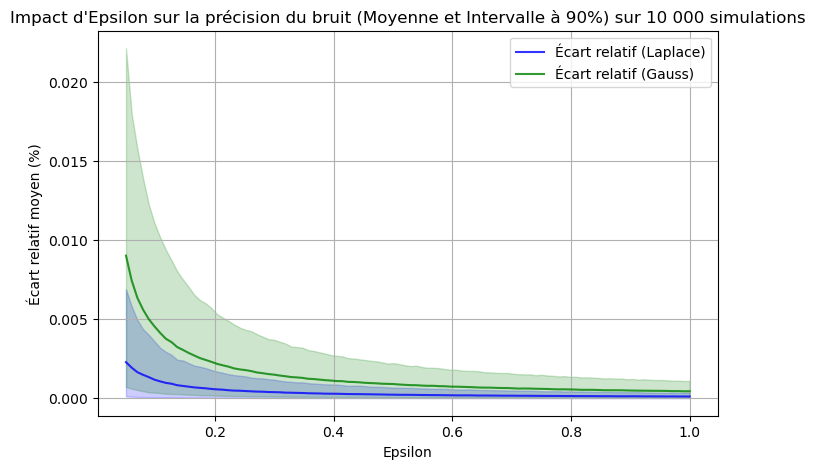

In [8]:
# Paramètres
epsilon_values = np.linspace(0.05, 1, 100)  # Éviter epsilon=0
n_repeats = 10000  # Nombre de répétitions

# Fonction pour obtenir l'écart relatif
def compute_relative_error(true_value, noisy_values):
    return [abs((nv - true_value) / true_value) * 100 for nv in noisy_values]

# Calcul des valeurs bruitées sur 5000 répétitions
noisy_values_laplace_all = np.array([[laplace_mech(len(df), 1, eps) for eps in epsilon_values] for _ in range(n_repeats)])
noisy_values_geom_all = np.array([[geometric_mech(len(df), 1, eps) for eps in epsilon_values] for _ in range(n_repeats)])
noisy_values_gauss_all = np.array([[gaussian_mech(len(df), 1, eps, delta=1e-5) for eps in epsilon_values] for _ in range(n_repeats)])

# Calcul de la moyenne des écarts relatifs pour chaque epsilon
true_value = len(df)
precision_laplace_all = np.array([compute_relative_error(true_value, noisy_values_laplace_all[i]) for i in range(n_repeats)])
precision_geom_all = np.array([compute_relative_error(true_value, noisy_values_geom_all[i]) for i in range(n_repeats)])
precision_gauss_all = np.array([compute_relative_error(true_value, noisy_values_gauss_all[i]) for i in range(n_repeats)])

# Calcul de l'intervalle de confiance à 90% (5% et 95%)
lower_laplace = np.percentile(precision_laplace_all, 5, axis=0)
upper_laplace = np.percentile(precision_laplace_all, 95, axis=0)

lower_geom = np.percentile(precision_geom_all, 5, axis=0)
upper_geom = np.percentile(precision_geom_all, 95, axis=0)

lower_gauss = np.percentile(precision_gauss_all, 5, axis=0)
upper_gauss = np.percentile(precision_gauss_all, 95, axis=0)

# Calcul de la moyenne pour chaque epsilon
mean_laplace = np.mean(precision_laplace_all, axis=0)
mean_geom = np.mean(precision_geom_all, axis=0)
mean_gauss = np.mean(precision_gauss_all, axis=0)

# Tracé du graphique
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, mean_laplace, label="Écart relatif (Laplace)", color='blue', linestyle='-', alpha=0.8)
#plt.plot(epsilon_values, mean_geom, label="Écart relatif (Laplace discret)", color='red', linestyle='-', alpha=0.8)
plt.plot(epsilon_values, mean_gauss, label="Écart relatif (Gauss)", color='green', linestyle='-', alpha=0.8)

# Ajout des intervalles de confiance à 90%
plt.fill_between(epsilon_values, lower_laplace, upper_laplace, color='blue', alpha=0.2)
#plt.fill_between(epsilon_values, lower_geom, upper_geom, color='red', alpha=0.2)
plt.fill_between(epsilon_values, lower_gauss, upper_gauss, color='green', alpha=0.2)

plt.xlabel("Epsilon")
plt.ylabel("Écart relatif moyen (%)")
plt.title("Impact d'Epsilon sur la précision du bruit (Moyenne et Intervalle à 90%) sur 10 000 simulations")
plt.legend()
plt.grid()
plt.show()

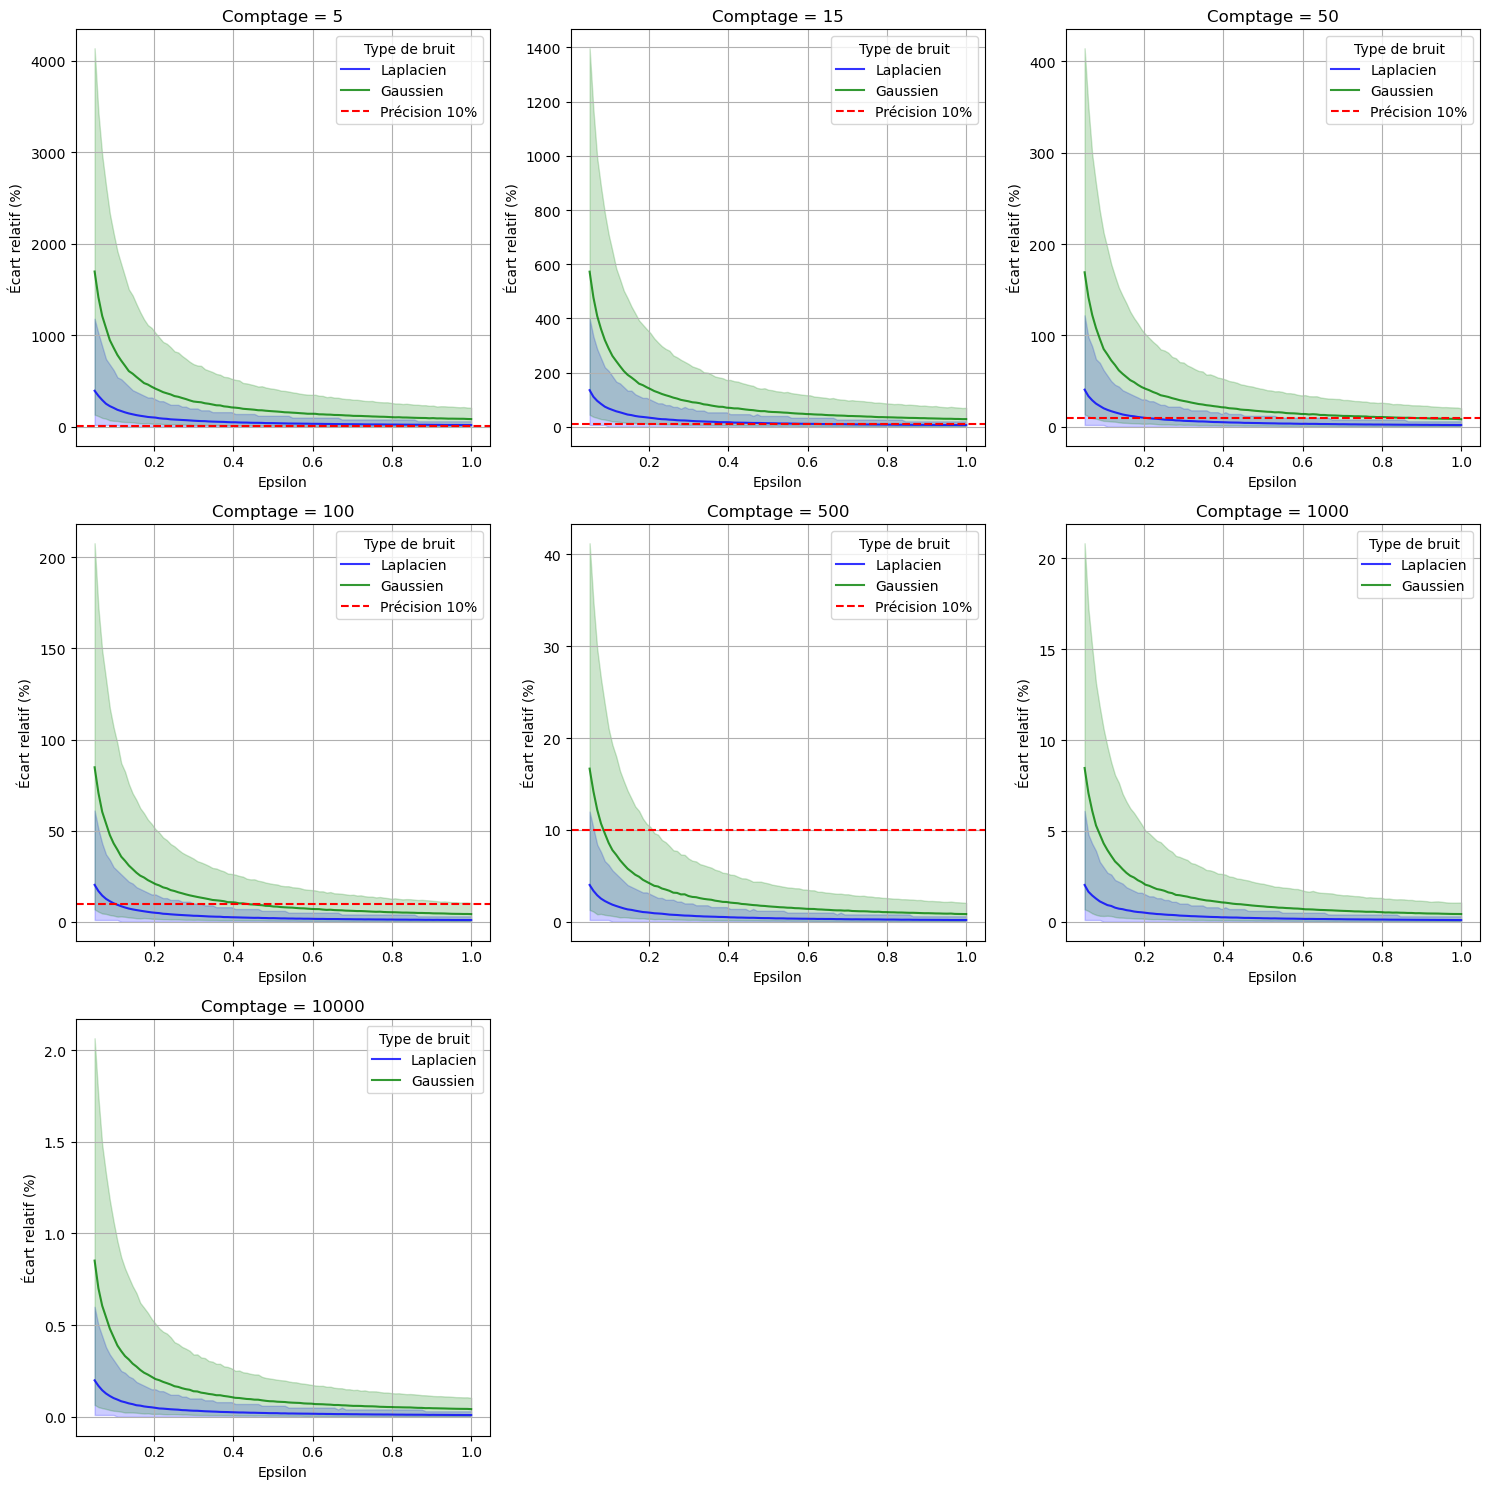

In [16]:
# Paramètres de simulation
specific_values = [5, 15, 50, 100, 500, 1000, 10000]
epsilon_values = np.linspace(0.05, 1, 100)  # Plage d'epsilon
n_repeats = 10000  # Nombre de répétitions

# Nombre de graphiques à afficher
n_plots = len(specific_values)
n_cols = 3  # Nombre de colonnes par ligne
n_rows = (n_plots + n_cols - 1) // n_cols  # Calcul du nombre de lignes nécessaires

# Création des sous-graphique
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

# Fonction pour calculer l'écart relatif
def compute_relative_error(true_value, noisy_values):
    return [abs((nv - true_value) / true_value) * 100 for nv in noisy_values]

# Création des graphiques pour chaque valeur spécifique
for i, value in enumerate(specific_values):
    ax = axes[i]
    
    # Calcul des valeurs bruitées pour chaque mécanisme sur plusieurs répétitions
    noisy_values_laplace_all = np.array([[round(laplace_mech(value, 1, eps)) for eps in epsilon_values] for _ in range(n_repeats)])
    noisy_values_gauss_all = np.array([[gaussian_mech(value, 1, eps, delta=1e-6) for eps in epsilon_values] for _ in range(n_repeats)])
    noisy_values_geo_all = np.array([[round(geometric_mech(value, 1, eps)) for eps in epsilon_values] for _ in range(n_repeats)])
    
    # Calcul des écarts relatifs
    precision_laplace_all = np.array([compute_relative_error(value, noisy_values_laplace_all[i]) for i in range(n_repeats)])
    precision_gauss_all = np.array([compute_relative_error(value, noisy_values_gauss_all[i]) for i in range(n_repeats)])
    precision_geo_all = np.array([compute_relative_error(value, noisy_values_geo_all[i]) for i in range(n_repeats)])
    
    # Calcul des quantiles à 90% (5% et 95%)
    lower_laplace = np.percentile(precision_laplace_all, 5, axis=0)
    upper_laplace = np.percentile(precision_laplace_all, 95, axis=0)

    lower_gauss = np.percentile(precision_gauss_all, 5, axis=0)
    upper_gauss = np.percentile(precision_gauss_all, 95, axis=0)

    lower_geo = np.percentile(precision_geo_all, 5, axis=0)
    upper_geo = np.percentile(precision_geo_all, 95, axis=0)

    # Calcul des moyennes des écarts relatifs
    mean_laplace = np.mean(precision_laplace_all, axis=0)
    mean_gauss = np.mean(precision_gauss_all, axis=0)
    mean_geo = np.mean(precision_geo_all, axis=0)
    
    # Tracé des courbes de précision et des intervalles de confiance
    ax.plot(epsilon_values, mean_laplace, label="Laplacien", color='blue', alpha=0.8)
    ax.plot(epsilon_values, mean_gauss, label="Gaussien", color='green', alpha=0.8)
    #ax.plot(epsilon_values, mean_geo, label="Géométrique", color='orange', alpha=0.8)

    # Ajouter les intervalles de confiance à 90%
    ax.fill_between(epsilon_values, lower_laplace, upper_laplace, color='blue', alpha=0.2)
    ax.fill_between(epsilon_values, lower_gauss, upper_gauss, color='green', alpha=0.2)
    #ax.fill_between(epsilon_values, lower_geo, upper_geo, color='orange', alpha=0.2)
    
    # Ajouter la ligne horizontale à 10% si nécessaire
    if max(mean_laplace) >= 10 or max(mean_gauss) >= 10 or max(mean_geo) >= 10:
        ax.axhline(10, color='red', linestyle='--', label="Précision 10%")
    
    # Détails du graphique
    ax.set_xlabel("Epsilon")
    ax.set_ylabel("Écart relatif (%)")
    ax.set_title(f"Comptage = {value}")
    ax.legend(title="Type de bruit")
    ax.grid()

# Masquer les sous-graphique non utilisés (s'il en reste)
for j in range(n_plots, len(axes)):
    axes[j].axis('off')

# Ajustement automatique des espaces entre les graphiques
plt.tight_layout()
plt.show()

## Sum

In [9]:
def auto_sum(df, epsilon, poids = 1/2):
    def create_query(b):
        return lambda df: df.clip(lower=0, upper=b).sum() - df.clip(lower=0, upper=b+1).sum()

    # Construct the stream of queries
    bs = range(100_000, 500_000, 1_000)
    queries = [create_query(b) for b in bs]

    epsilon_b = epsilon * poids
    epsilon_sum = epsilon * (1-poids)

    
    final_b = bs[above_threshold(queries, df, 0, epsilon_b)]

    # Compute the noisy sum and noisy count, using 1/3 of the privacy budget for each
    noisy_sum = laplace_mech(df.clip(lower=0, upper=final_b).sum(), final_b, epsilon_sum)
    
    return noisy_sum


def NoisySum(df, L: float, U: float, epsilon: float, delta = None, distrib = "Laplace"):
    s = max(abs(L), abs(U))
    if distrib == "Laplace":
        return laplace_mech(df.clip(lower=L, upper=U).sum(),s, epsilon)
    elif distrib == "Gauss":# De#"r"
        return gaussian_mech(df.clip(lower=L, upper=U).sum(),s, epsilon, delta)
        
print(auto_sum(df[var_1], 1))
print(NoisySum(df[var_1], 0, 100, 1))
print(NoisySum(df[var_1], 0, 100, 0.9, 1e-5, distrib="Gauss"))
print(df[var_1].sum())

16567793033.70568
86612528.1156123
86613815.60148242
16568158532.7


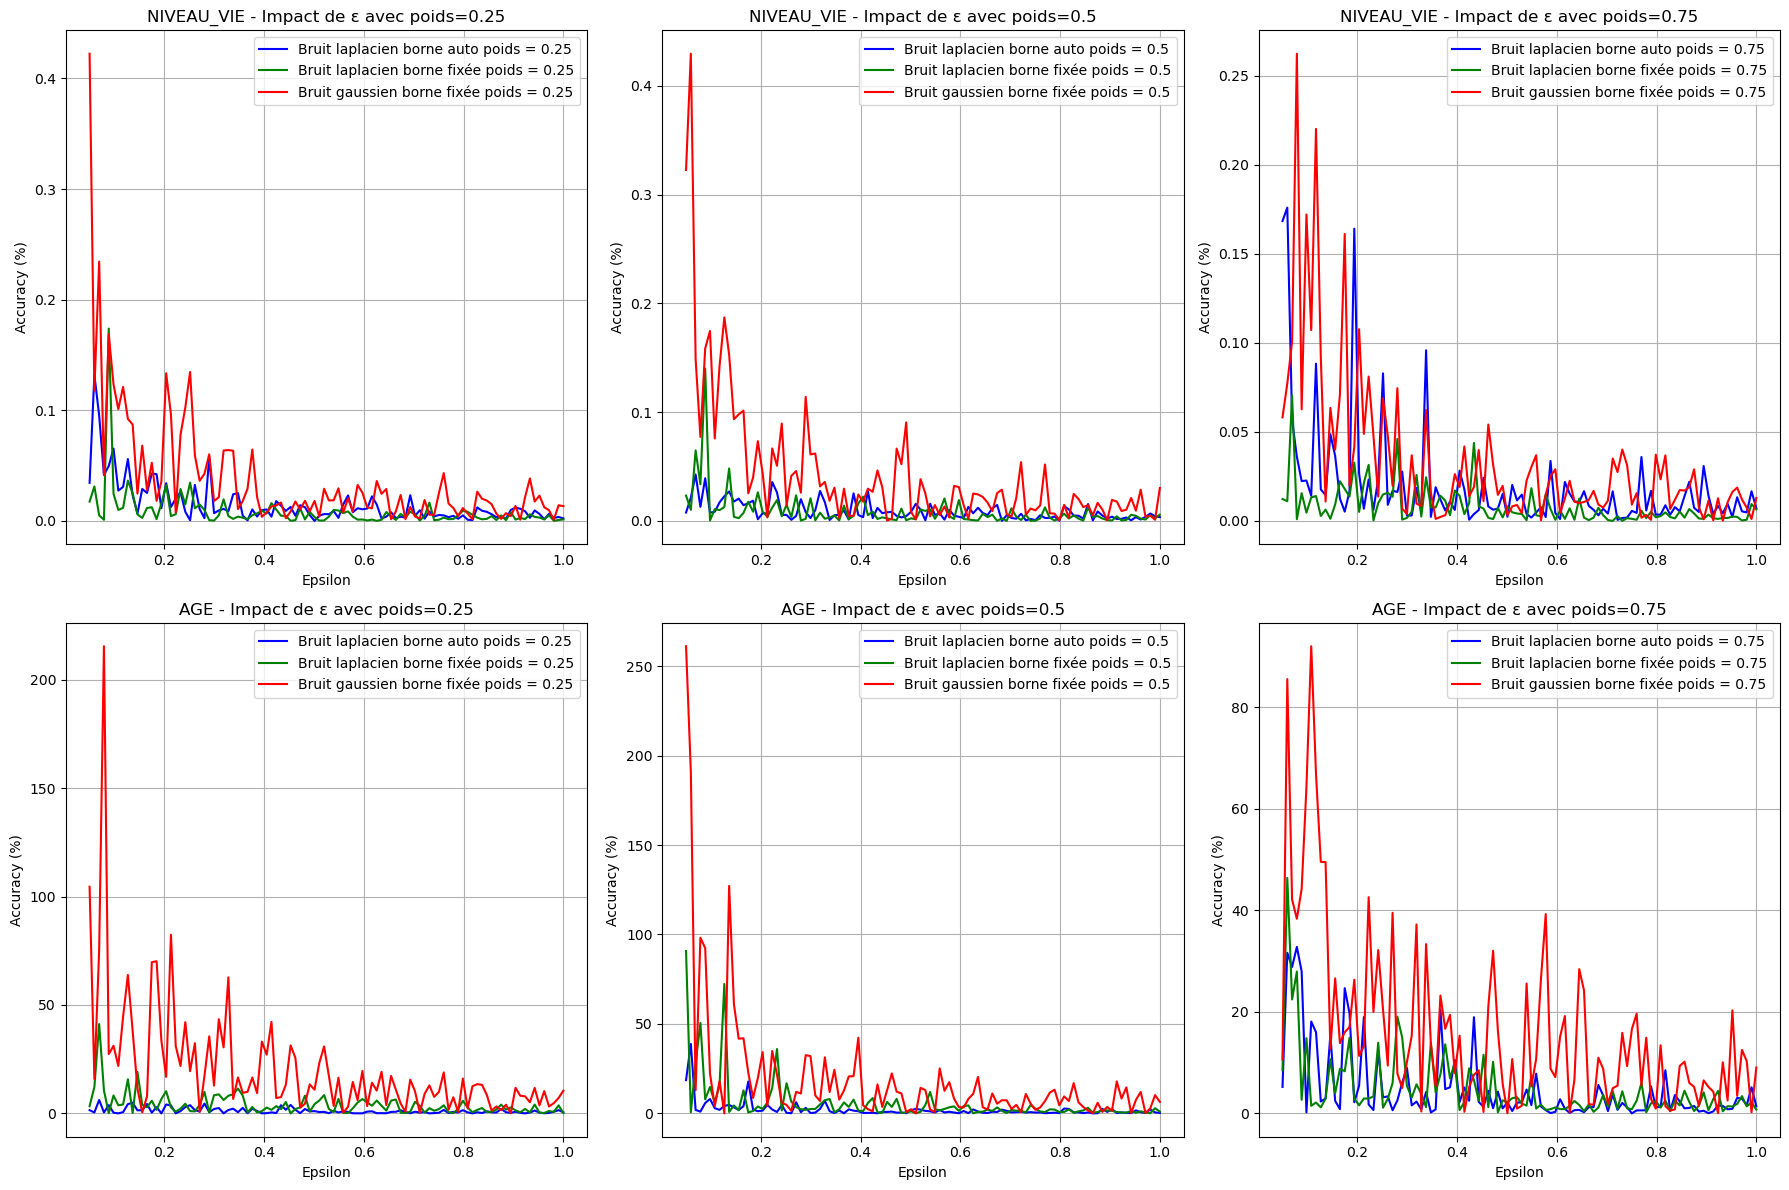

In [ ]:
# Paramètres
epsilon_values = np.linspace(0.05, 1, 100)  # Éviter epsilon=0
poids_values = [1/4, 1/2, 3/4]  # Différentes valeurs de poids

# Création des subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # 2 lignes, 3 colonnes
axes = axes.flatten()  # Facilité d'indexation

# Valeur réelle pour les deux variables
real_value_1 = df[var_1].sum()
real_value_2 = df[var_2].sum()

# Boucle pour calculer les valeurs bruitées et l'accuracy pour la variable 1
for i, poids in enumerate(poids_values):
    # Bruit laplacien, bruit avec borne fixe, bruit gaussien pour variable 1
    noisy_values_1 = [auto_sum(df[var_1], eps, poids) for eps in epsilon_values]
    noisy_values_2 = [NoisySum(df[var_1], 0, 500_000, eps) for eps in epsilon_values]
    noisy_values_3 = [NoisySum(df[var_1], 0, 500_000, eps, 1e-5, distrib="Gauss") for eps in epsilon_values]
    
    # Calcul de l'accuracy pour chaque valeur bruitée
    accuracy_1 = [100 * abs(nv - real_value_1) / real_value_1 for nv in noisy_values_1]
    accuracy_2 = [100 * abs(nv - real_value_1) / real_value_1 for nv in noisy_values_2]
    accuracy_3 = [100 * abs(nv - real_value_1) / real_value_1 for nv in noisy_values_3]
    
    # Graphique pour la variable 1
    ax = axes[i]
    ax.plot(epsilon_values, accuracy_1, label=f"Bruit laplacien borne auto poids = {poids}", color='blue')
    ax.plot(epsilon_values, accuracy_2, label=f"Bruit laplacien borne fixée poids = {poids}", color='green')
    ax.plot(epsilon_values, accuracy_3, label=f"Bruit gaussien borne fixée poids = {poids}", color='red')
    
    ax.set_xlabel("Epsilon")
    ax.set_ylabel("Accuracy (%)")
    ax.set_title(f"{var_1} - Impact de ε avec poids={poids}")
    ax.legend()
    ax.grid()

# Boucle pour calculer les valeurs bruitées et l'accuracy pour la variable 2
for i, poids in enumerate(poids_values):
    # Bruit laplacien, bruit avec borne fixe, bruit gaussien pour variable 2
    noisy_values_1 = [auto_sum(df[var_2], eps, poids) for eps in epsilon_values]
    noisy_values_2 = [NoisySum(df[var_2], 0, 500_000, eps) for eps in epsilon_values]
    noisy_values_3 = [NoisySum(df[var_2], 0, 500_000, eps, 1e-5, distrib="Gauss") for eps in epsilon_values]
    
    # Calcul de l'accuracy pour chaque valeur bruitée
    accuracy_1 = [100 * abs(nv - real_value_2) / real_value_2 for nv in noisy_values_1]
    accuracy_2 = [100 * abs(nv - real_value_2) / real_value_2 for nv in noisy_values_2]
    accuracy_3 = [100 * abs(nv - real_value_2) / real_value_2 for nv in noisy_values_3]
    
    # Graphique pour la variable 2
    ax = axes[i + 3]  # Décalage de 3 pour placer dans la deuxième ligne
    ax.plot(epsilon_values, accuracy_1, label=f"Bruit laplacien borne auto poids = {poids}", color='blue')
    ax.plot(epsilon_values, accuracy_2, label=f"Bruit laplacien borne fixée poids = {poids}", color='green')
    
    ax.set_xlabel("Epsilon")
    ax.set_ylabel("Accuracy (%)")
    ax.set_title(f"{var_2} - Impact de ε avec poids={poids}")
    ax.legend()
    ax.grid()

# Ajustement des graphiques pour un affichage propre
plt.tight_layout()
plt.show()

## Mean

In [75]:
def auto_avg(df, epsilon):

    # Compute the noisy sum and noisy count
    noisy_sum = auto_sum(df, 4*epsilon / 5)
    noisy_count = laplace_mech(len(df), 1, epsilon / 5)
    
    return noisy_sum/noisy_count

def saa(df, k, epsilon, u, l, logging=False):
    
    # Calculate the number of rows in each chunk
    chunk_size = int(np.ceil(df.shape[0] / k))
    
    if logging:
        print(f'Chunk size: {chunk_size}')
        
    # Step 1: split `df` into chunks
    xs = [df[i:i+chunk_size] for i in range(0,df.shape[0],chunk_size)]
    
    # Step 2: run f on each x_i and clip its output
    answers = [x_i.mean() for x_i in xs]
    
    clipped_answers = np.clip(answers, l, u)
    
    # Step 3: take the noisy mean of the clipped answers
    noisy_mean = laplace_mech(np.mean(clipped_answers), (u-l)/k, epsilon)
    return noisy_mean

# print(sample_and_aggregate(df[var_1],  lambda x: x.mean(), 600, 1, logging=False))
print(auto_avg(df[var_1], 1))

19098.740730253558


Fail


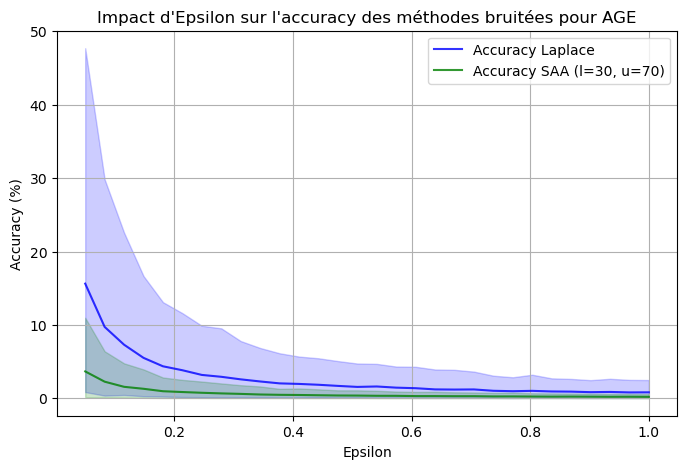

In [102]:
# Paramètres
epsilon_values = np.linspace(0.05, 1, 30)  # Valeurs d'epsilon
n_repeats = 1000  # Nombre de répétitions

# Fonction pour obtenir l'accuracy
def compute_accuracy(true_value, noisy_values):
    return [100 * abs(nv - true_value) / true_value for nv in noisy_values]

# Calcul des valeurs bruitées sur n_repeats répétitions
noisy_values_laplace_all = np.array([[auto_avg(df[var_2], eps) for eps in epsilon_values] for _ in range(n_repeats)])
noisy_values_saa_all = np.array([[saa(df[var_2], k=600, epsilon=eps, u=70, l=30) for eps in epsilon_values] for _ in range(n_repeats)])

# Calcul de la moyenne des accuracies pour chaque epsilon
true_value = df[var_2].mean()
accuracy_laplace_all = np.array([compute_accuracy(true_value, noisy_values_laplace_all[i]) for i in range(n_repeats)])
accuracy_saa_all = np.array([compute_accuracy(true_value, noisy_values_saa_all[i]) for i in range(n_repeats)])

# Calcul de l'intervalle de confiance à 90% (5% et 95%)
lower_laplace = np.percentile(accuracy_laplace_all, 5, axis=0)
upper_laplace = np.percentile(accuracy_laplace_all, 95, axis=0)

lower_saa = np.percentile(accuracy_saa_all, 5, axis=0)
upper_saa = np.percentile(accuracy_saa_all, 95, axis=0)

# Calcul de la moyenne pour chaque epsilon
mean_laplace = np.mean(accuracy_laplace_all, axis=0)
mean_saa = np.mean(accuracy_saa_all, axis=0)

# Tracé du graphique
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, mean_laplace, label="Accuracy Laplace", color='blue', linestyle='-', alpha=0.8)
plt.plot(epsilon_values, mean_saa, label="Accuracy SAA (l=30, u=70)", color='green', linestyle='-', alpha=0.8)

# Ajout des intervalles de confiance à 90%
plt.fill_between(epsilon_values, lower_laplace, upper_laplace, color='blue', alpha=0.2)
plt.fill_between(epsilon_values, lower_saa, upper_saa, color='green', alpha=0.2)

plt.xlabel("Epsilon")
plt.ylabel("Accuracy (%)")
plt.title(f"Impact d'Epsilon sur l'accuracy des méthodes bruitées pour {var_2}")
plt.legend()
plt.grid()
plt.show()

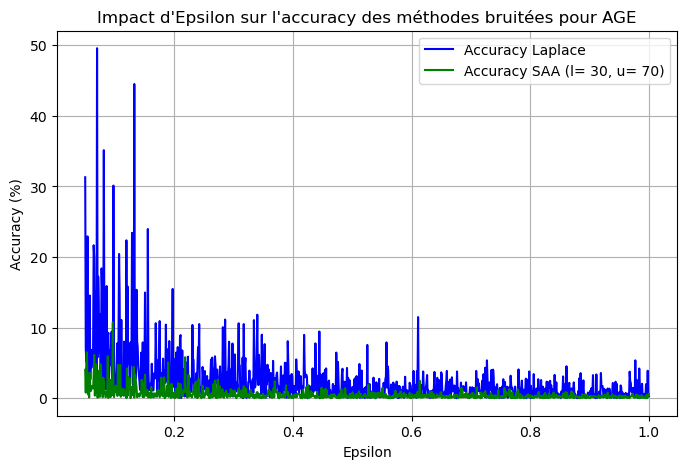

In [78]:
# Paramètres
epsilon_values = np.linspace(0.05, 1, 1000)  # Valeurs d'epsilon
real_value = df[var_2].mean()  # Valeur réelle (moyenne)

# Calcul des valeurs bruitées
noisy_values = [auto_avg(df[var_2], eps) for eps in epsilon_values]
noisy_values_saa = [saa(df[var_2], k = 600, epsilon = eps, u= 70, l = 30) for eps in epsilon_values]

# Calcul de l'accuracy en pourcentage
accuracy_laplace = [100 * abs(nv - real_value) / real_value for nv in noisy_values]
accuracy_saa = [100 * abs(nv - real_value) / real_value for nv in noisy_values_saa]

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, accuracy_laplace, label="Accuracy Laplace", color='blue')
plt.plot(epsilon_values, accuracy_saa, label="Accuracy SAA (l= 30, u= 70)", color='green')

plt.xlabel("Epsilon")
plt.ylabel("Accuracy (%)")
plt.title(f"Impact d'Epsilon sur l'accuracy des méthodes bruitées pour {var_2}")
plt.legend()
plt.grid()
plt.show()

## Variance

In [33]:
def auto_var(df, epsilon):
    def create_query(b):
        mean_val = df.mean()
        # Transformation (x - mean)^2
        df_transfo = (df - mean_val) ** 2

        return lambda df: df_transfo.clip(lower=0, upper=b).sum() - df_transfo.clip(lower=0, upper=b+1).sum()

    # Construct the stream of queries
    bs = range(100_000, 500_000, 1_000)
    queries = [create_query(b) for b in bs]
    
    # Run AboveThreshold, using 1/3 of the privacy budget, to find a good clipping parameter
    final_b = bs[above_threshold(queries, df, 0, epsilon / 10)]

    mean_val = df.mean()
    # Transformation (x - mean)^2
    df_transfo = (df - mean_val) ** 2

    # Compute the noisy sum and noisy count, using 1/3 of the privacy budget for each
    noisy_sum = laplace_mech(df_transfo.clip(lower=0, upper=final_b).sum(), final_b**2, 8*epsilon / 10)
    noisy_count = laplace_mech(len(df), 1, epsilon / 10)
    
    return noisy_sum / noisy_count

print(auto_var(df[var_1], 1000))

Fail
301941.5465562455


Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail


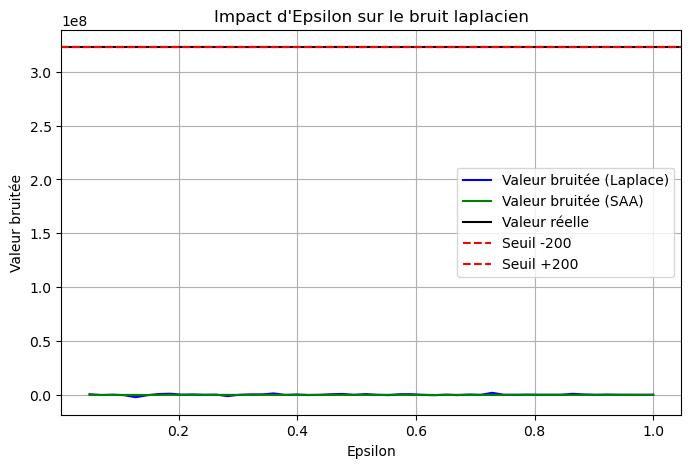

In [34]:
epsilon_values = np.linspace(0.05, 1, 50)  
noisy_values = [auto_var(df[var_1], eps) for eps in epsilon_values]
noisy_values_saa = [sample_and_aggregate(df[var_1], f=lambda x: x.var(), k = 20, epsilon = eps, l = 0) for eps in epsilon_values]

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, noisy_values, label="Valeur bruitée (Laplace)", color='blue')
plt.plot(epsilon_values, noisy_values_saa, label="Valeur bruitée (SAA)", color='green')
plt.axhline(df[var_1].var(), color='black', linestyle='-', label="Valeur réelle")
plt.axhline(df[var_1].var()-200, color='red', linestyle='--', label="Seuil -200")
plt.axhline(df[var_1].var()+200, color='red', linestyle='--', label="Seuil +200")

plt.xlabel("Epsilon")
plt.ylabel("Valeur bruitée")
plt.title("Impact d'Epsilon sur le bruit laplacien")
plt.legend()
plt.grid()
plt.show()

## Standard deviation

In [ ]:
def auto_std(df, epsilon):
    return auto_var(df,epsilon)**(1/2)

print(auto_std(df[var_1], 1))

18.35701292767423


## Ratio

In [ ]:
def auto_ratio(df_1, df_2, epsilon):

    # Compute the 2 noisy sums
    noisy_sum_1 = auto_sum(df_1, epsilon / 2)
    noisy_sum_2 = auto_sum(df_2, epsilon / 2)
    
    return noisy_sum_1 / noisy_sum_2

print(auto_ratio(df[var_1], df[var_2], 1))

0.4962247641829044


/tmp/ipykernel_101907/1004263880.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  T_hat = T + np.random.laplace(loc=0, scale = 2/epsilon)
/tmp/ipykernel_101907/1004263880.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  nu_i = np.random.laplace(loc=0, scale = 4/epsilon)
/tmp/ipykernel_101907/1004263880.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return v + np.random.laplace(loc=0, scale=sensitivity/epsilon)
/tmp/ipykernel_101907/1004263880.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  T_hat = T + np.random.laplace(loc=0, scale = 2/epsilon)
/tmp/ipykernel_101907/1004263880.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  nu_i = np.random.laplace(loc=0, scale = 4/epsilon)
/tmp/ipykernel_101907/1004263880.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return v + np.random.laplace(loc=0, scale=sensitivity/epsilon)
/tmp/ipykernel_101907/3299904202.py:7: RuntimeWarning:

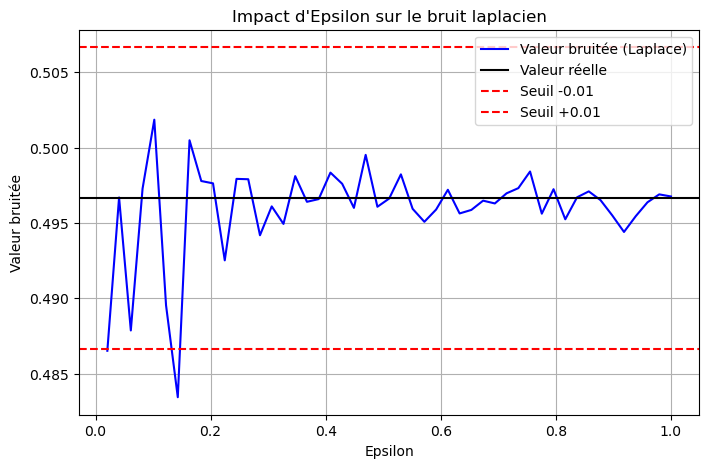

In [ ]:
epsilon_values = np.linspace(0, 1, 50)  
noisy_values = [auto_ratio(df[var_1], df[var_2], eps) for eps in epsilon_values]

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, noisy_values, label="Valeur bruitée (Laplace)", color='blue')
plt.axhline((df['val_1'].sum()/ df[var_2].sum()), color='black', linestyle='-', label="Valeur réelle")
plt.axhline((df['val_1'].sum() / df[var_2].sum()) -0.01, color='red', linestyle='--', label="Seuil -0.01")
plt.axhline((df['val_1'].sum()/ df[var_2].sum()) +0.01, color='red', linestyle='--', label="Seuil +0.01")

plt.xlabel("Epsilon")
plt.ylabel("Valeur bruitée")
plt.title("Impact d'Epsilon sur le bruit laplacien")
plt.legend()
plt.grid()
plt.show()

## Correlation

In [ ]:
def auto_corr(df_1, df_2, epsilon):

    # Compute the 2 noisy sums
    noisy_mean_1_2 = auto_avg(df_1 * df_2, epsilon / 11)
    noisy_mean_1 = auto_avg(df_1, epsilon / 11)
    noisy_mean_2 = auto_avg(df_2, epsilon / 11)

    noisy_std_1 = auto_std(df_1, 4*epsilon/11)
    noisy_std_2 = auto_std(df_2, 4*epsilon/11)
    
    return (noisy_mean_1_2 - noisy_mean_1 * noisy_mean_2) / (noisy_std_1 * noisy_std_2)


print(auto_corr(df[var_1], df[var_2], 10))

-0.00639141286880942


## Quantile

In [104]:
import numpy as np

# Définir les fonctions φ et τ
def phi(i, i_prime, j, epsilon, n, q, delta_uQ = 2):
    if i > i_prime:
        return 0
    return np.exp(-epsilon / (2 * delta_uQ) * abs(i_prime - i - (q[j]-q[j-1])*n))

def tau(i, X):
    return X[i + 1] - X[i]

# Calculer α(j, i, k) pour chaque j, i et k
def compute_alpha(X, q, epsilon, m, a, b, delta_uQ = 2):
    n = len(X)
    X = np.insert(X, 0, a)
    X = np.append(X, b)
    alpha = np.zeros((m, n, m))

    # Calculer α(1, i, 1) pour tous i
    for i in range(n+1):
        alpha[0, i, 0] = phi(0, i, 1, epsilon, n, q) * tau(i, X)
    
    # Calculer les autres α(j, i, k)
    for j in range(1, m+1):
        for i in range(n+1):
            alpha_hat[j - 1, i] = np.sum(alpha[j - 1, i, :j-1])

        alpha[j, :, 0] = tau(np.arange(n), X) * np.dot(alpha[:, :, j].T, alpha_hat[j - 1, :].T)
            
        for k in range(2, j + 1):
            for i in range(n+1):
                alpha[j, i, k-1] = tau(i, X) * phi(i, i, j, epsilon, n, q) * alpha[j - 1, i, k - 2] / k
    
    return alpha

# Fonction pour échantillonner à partir de α
def sample_sequence(alpha, X, epsilon, m):
    sampled_sequence = []
    n = len(X)  # Nombre total d'éléments dans X
    
    # 1. Échantillonnage initial (i, k) ∝ α(m, i, k) * φ(i, n, m + 1)
    i, k = np.random.choice(n, p=alpha[m-1, :, -1] * np.exp(-np.abs(X[-1] - X) / m))  # On prend φ(i, n, m+1) comme une fonction de X[-1]
    sampled_sequence.append(i)
    
    # 2. Boucle de rééchantillonnage inverse
    j = m - k  # Début de la boucle inverse, avec j=m-k
    while j > 0:
        # 2.1 Échantillonnage (i′, k′) ∝ α(j, i′, k′) * φ(i′, i, j + 1)
        phi_term = np.exp(-np.abs(X[i] - X) / (m - k + 1))  # Calcul de φ(i′, i, j+1)
        i_prime, k_prime = np.random.choice(n, p=alpha[j - k, :, k_prime - 1] * phi_term)  # Probabilités associées au rééchantillonnage
        sampled_sequence.append(i_prime)
        
        # 2.2 Mise à jour de l'intervalle
        for k_prime in range(k, 0, -1):
            i_prime, k_prime = np.random.choice(n, p=alpha[j-k, :, k_prime-1] * np.exp(-np.abs(X[i_prime] - X[i]) / (m - k + 1)))
            sampled_sequence.append(i_prime)
        
        j -= k  # Réduire j par k
    
    # 3. Output uniform samples {oj ∼ U [xij , xij+1)} m j=1 en ordre croissant
    sampled_sequence = sorted(sampled_sequence)
    uniform_samples = [np.random.uniform(X[sampled_sequence[i]], X[sampled_sequence[i + 1]]) for i in range(len(sampled_sequence) - 1)]
    
    return uniform_samples
# Paramètres d'entrée
X = np.sort(np.random.rand(100))  # Exemple de données triées
epsilon = 0.5  # Paramètre de confidentialité
delta_uQ = 2  # Plage de l'intervalle
n = np.arange(len(X))